# Hénon–Heiles Energy Conservation

In [1]:
using OrdinaryDiffEq, Plots
#using TaylorIntegration
using IRKGaussLegendre
using LinearAlgebra

- In this notebook we will study the energy conservation properties of several high-order methods for the Hénon–Heiles system. The Hamiltonian for this system is given by

$$ H(p,q)=\frac{1}{2}(p_1^2+p_2^2)+U(q)$$

and

$$Uq)=\frac{1}{2} (q_1^2+q_2^2)+q_1^2q_2-\frac{1}{3} q_2^3$$

- We choose initial values such the solution is chaotic


- Reference: "Achieving Brouwer law with implicit Runge-Kutta methods" E. Hairer, R.I. McLachlan and A. Razakarivony

<a href="#top">Back to the top</a>

## Initial value problem: Hénon-Heiles 

In [2]:
setprecision(BigFloat, 108);
include("../ODEProblems/HenonHeiles.jl")
include("../ODEProblems/InitialHenonHeiles.jl")

dt=2*pi/140
t0=0.0
t1=2*pi*10^6
t1=2*pi*10^2

u0=InitialHenon(Float64)

q0=u0[1:2]
p0=u0[3:4]

tspan=(t0,t1)
probdyn=DynamicalODEProblem(dotq,dotp,q0,p0,tspan)
prob2nd=SecondOrderODEProblem(f2nd!,p0,q0,tspan)

mysaveat=10^2

100

## Energy errors

In [3]:
setprecision(BigFloat, 256)

u0Big=BigFloat.(u0)
E0=HenonHam(u0Big,[]);

### Numerical integrations

In [4]:
sol1= solve(probdyn,IRKGL16(),adaptive=false, dt=dt,saveat=mysaveat)
sol1.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  296356
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          14000
Number of rejected steps:                          0

In [5]:
sol2 = solve(probdyn, KahanLi8(), dt=dt, maxiters=1e10)
sol2.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  252019
Number of function 2 evaluations:                  238018
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          14001
Number of rejected steps:                          0

In [6]:
sol3 = solve(probdyn, SofSpa10(), dt=dt, maxiters=1e8)
sol3.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  504037
Number of function 2 evaluations:                  490036
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          14001
Number of rejected steps:                          0

In [7]:
sol4 = solve(prob2nd, DPRKN12(), abstol=1e-14, reltol=1e-14)
sol4.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  36706
Number of function 2 evaluations:                  2160
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          2101
Number of rejected steps:                          58

### Plots

In [8]:
k=mysaveat
ΔE1 = map(x->HenonHam(BigFloat.(x),[]), sol1.u)./E0.-1;
ΔE2 = map(x->HenonHam(BigFloat.(x),[]), sol2.u[1:k:end])./E0.-1;
#ΔE2 = map(x->HenonHam(BigFloat.(vcat(x[2,:],x[1,:])),[]), sol2.u)./E0.-1
ΔE3 = map(x->HenonHam(BigFloat.(x),[]), sol3.u[1:k:end])./E0.-1;
#ΔE3 = map(x->HenonHam(BigFloat.(vcat(x[2,:],x[1,:])),[]), sol3.u)./E0.-1
ΔE4 = map(x->HenonHam(BigFloat.(vcat(x[2,:],x[1,:])),[]), sol4.u[1:k:end])./E0.-1;

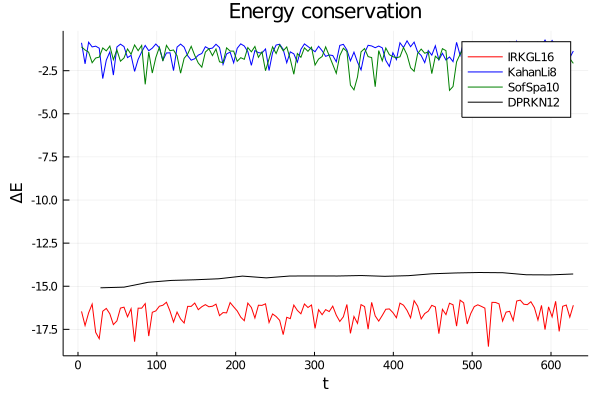

In [9]:
plot(title="Energy conservation", xlabel="t", ylabel="ΔE")
plot!(sol1.t,log10.(abs.(ΔE1)), label="IRKGL16", color="red")
plot!(sol2.t[1:k:end],log10.(abs.(ΔE2)), label="KahanLi8", color="blue")
plot!(sol3.t[1:k:end],log10.(abs.(ΔE3)), label="SofSpa10", color="green")
plot!(sol4.t[1:k:end],log10.(abs.(ΔE4)), label="DPRKN12", color="black")